## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **4th November 2024 at 11:59 pm**. 

6. Some questions in this assignment do not have a single correct answer. As data visualization is subject to interpretation, any logically sound answer / explanation is acceptable.

7. There is a bonus question worth 20 points. However, there is no partial credit for the bonus question. You will get 20 or 0. If everything is correct, you can score 120 out of 100 in the assignment.

# Exploring factors associated with profitability of a movie {-}
In this assignment we'll attempt to find the factors (or variables) that make a movie profitable.

Read the movies data from [here](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json), in a Pandas DataFrame named as `movies_data`. The profit of movie is defined as:

$$profit = Worldwide \ Gross - Production \ Budget$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies_data = pd.read_json("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/movie_data.json")
movies_data["Profit"] = movies_data["Worldwide Gross"] - movies_data["Production Budget"]


## D.1 Time trend
Let us analyze if the profitability of a movie is associated with the time of its release.

### D.1.1 Month of release
#### D.1.1.1
Make an appropriate plot to visualize the mean profit of movies released each month.

**Hint:** 

1. Use the Pandas function [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert *Release Date* to a `datetime` datatype.

2. Use the library [`datetime`](https://docs.python.org/3/library/datetime.html) to extract the month from *Release Date*.

*(6 points)*

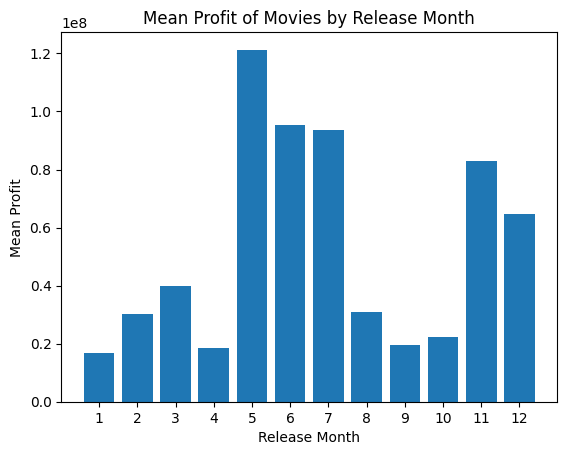

In [2]:
movies_data["Release Date"] = pd.to_datetime(movies_data["Release Date"])
movies_data["release_month"] = movies_data["Release Date"].dt.month

# calculate mean profit of movies for each release_month value
mean_profit_per_month = movies_data.groupby('release_month')['Profit'].mean()

# plot the mean profit of movies for each release_month value
plt.bar(mean_profit_per_month.index - 1, mean_profit_per_month.values)
plt.xlabel('Release Month')
plt.ylabel('Mean Profit')
plt.title('Mean Profit of Movies by Release Month')
plt.xticks(ticks=range(12), labels=range(1, 13), rotation=0)
plt.show()



#### D.1.1.2

Based on the plot, which seasons have been the most and least profitable (on an average) for a movie release. Don't worry about the exact start and end date of seasons. Don't perform any computations. Just make comments based on the plot. You can use seasons such as *early summer, late spring* etc. 

*(2 points)*

Early summer (May through July) and late fall into early winter (November and December) tend to be the most profitable seasons for a movie release. On the other hand, late winter into early spring (january through April) and late summer into early fall (august through october) tend to be the least profitable seasons for a movie release.

### D.1.2 Month of release with number of movies in each genre

####  D.1.2.1
Now that we know the most profitable season for releasing movies, let us visualize if some `genre`s are more popular during certain seasons.

Use the code below to create a new column called `genre`.

In [3]:
#Combining Major Genre
movies_data['genre'] = movies_data['Major Genre'].apply(lambda x:'Comedy' if x!=None and 'Comedy' in x else 'Horror' if x!=None and 'Thriller' in x else 'Action/Adventure' if x!=None and ('Action' in x or 'Adventure' in x) else 'Musical/Western' if x!=None and ('Musical' in x or 'Western' in x or 'Concert' in x) else x)

Make an appropriate plot to visualize the number of movies released for each `genre` in each calendar month.

*(8 points)*

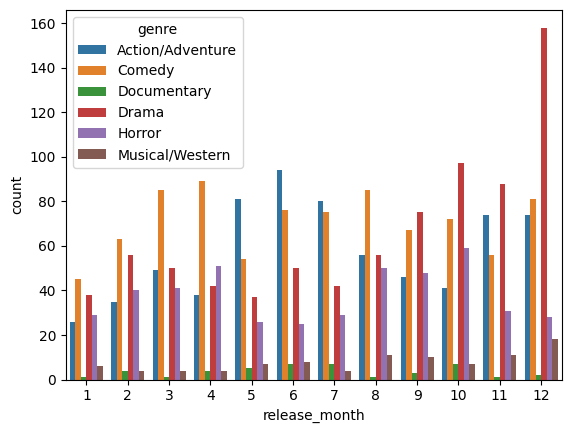

In [4]:
month_and_genre = movies_data.groupby(['release_month', 'genre'])['Title'].count().reset_index(name='count')

sns.barplot(data=month_and_genre, x='release_month', y='count',  hue='genre');

**Hint:** 

1. Use [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) with *estimator* as `len`

2. Use the *hue* argument

####  D.1.2.2 
Based on the above plot, which `genre` is the most popular during the most profitable season of release? And which genre is the most popular during the least profitable season of release?

*(2 points)*

Action/Adventure is most popular during the most profitable season of release (May - July). Drama is the most popular genre during the least profitable season of release (September - October).

### D.1.3 Month of release with proportion of movies in each genre
#### D.1.3.1
Visualize the proportion of movies in each `genre` for each month of release.

Use the code below to re-arrange your data that will help with creating the visualization

In [5]:
genre_proportion_release_month = pd.crosstab(index=movies_data['release_month'],
                             columns=movies_data['genre'],
                             normalize="index")
genre_proportion_release_month.head()

genre,Action/Adventure,Comedy,Documentary,Drama,Horror,Musical/Western
release_month,,,,,,
1,0.179310,0.310345,0.006897,0.262069,0.200000,0.041379
2,0.173267,0.311881,0.019802,0.277228,0.198020,0.019802
3,0.213043,0.369565,0.004348,0.217391,0.178261,0.017391
4,0.166667,0.390351,0.017544,0.184211,0.223684,0.017544
5,0.385714,0.257143,0.023810,0.176190,0.123810,0.033333


**Hint:** 

1. Make a 100% stacked barplot with the Pandas [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function

2. Use the argument `bbox_to_anchor` with the Matplotlib function [legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) to place the legend outside the plot area.

*(8 points)*

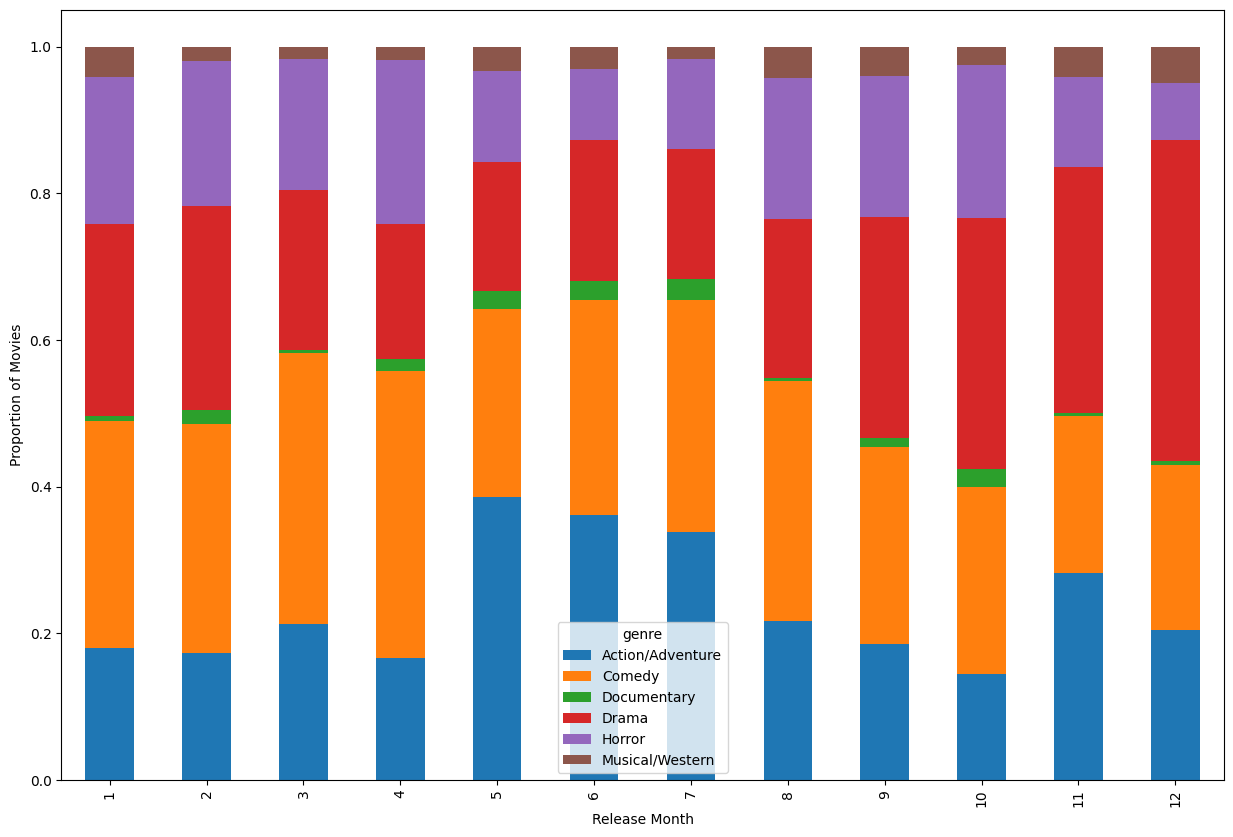

In [6]:
ax = genre_proportion_release_month.plot.bar(stacked=True, ylabel = "Proportion of Movies", figsize= (15, 10), xlabel = "Release Month")

#### D.1.3.2 
Which `genre` is the most popular during the month of May, and which one is the most popular during December?

*(2 points)*

Action/adventure is most popular in May and Drama is most popular in December

### D.1.4 Year of release with genre
#### D.1.4.1
Make an appropriate figure to visualize the average profit of movies of each `genre` for each year. Consider only the movies released from 1991 to 2010. Also show the 95% confidence interval in the average profit.

**Hint:**

1. Use the library `datetime` to extract year from `Release Date`.

2. Use the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

3. A figure can have multiple subplots. Put the figure for each genre in a separate subplot.

*(6 points)*

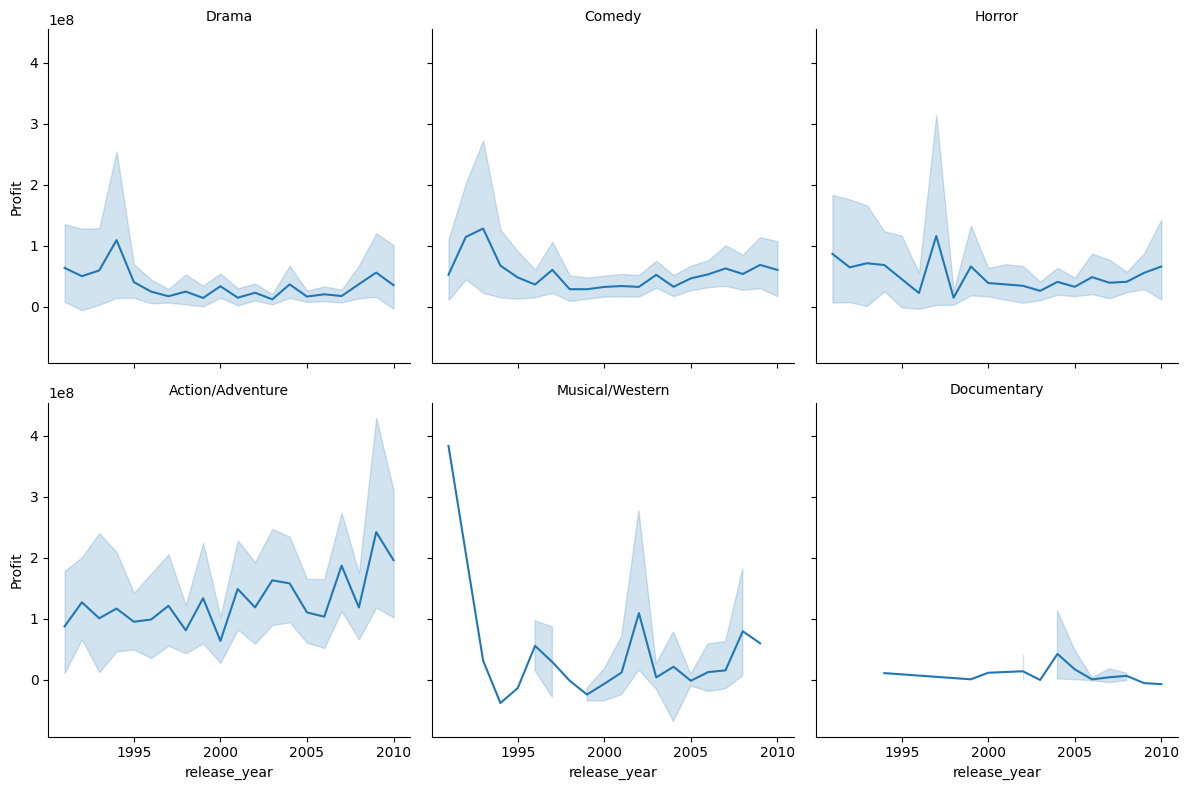

In [80]:
# create release_year column by extracting year from Release Date
movies_data["release_year"] = pd.to_datetime(movies_data["Release Date"]).dt.year
# create new data frame with only movies released between 1991 and 2010
year_filter = movies_data[(movies_data["release_year"] >= 1991) & (movies_data["release_year"] <= 2010)]

g = sns.FacetGrid(year_filter, col="genre", col_wrap=3, height=4)
g.set_axis_labels('Release Year', 'Average Profit')
g.set_titles(col_template='{col_name}')
g.map_dataframe(sns.lineplot, x='release_year', y='Profit', estimator = "mean", errorbar=('ci', 95));


#### D.1.4.2 
Based on the figure above, which `genre`'s profitability seems to be increasing over the years, and which `genre` has the least uncertainty in profit for most of the years.


*(2 points)*

Action/adventure's profitability seems to be increasing over time and documentary is the genre with the least uncertainty in profit.

## D.2 Associations

### D.2.1 Pairplot / heatmap

#### D.2.1.1 
Make a pairplot and heatmap of all the continuous variables in the data.

*(8 points)*

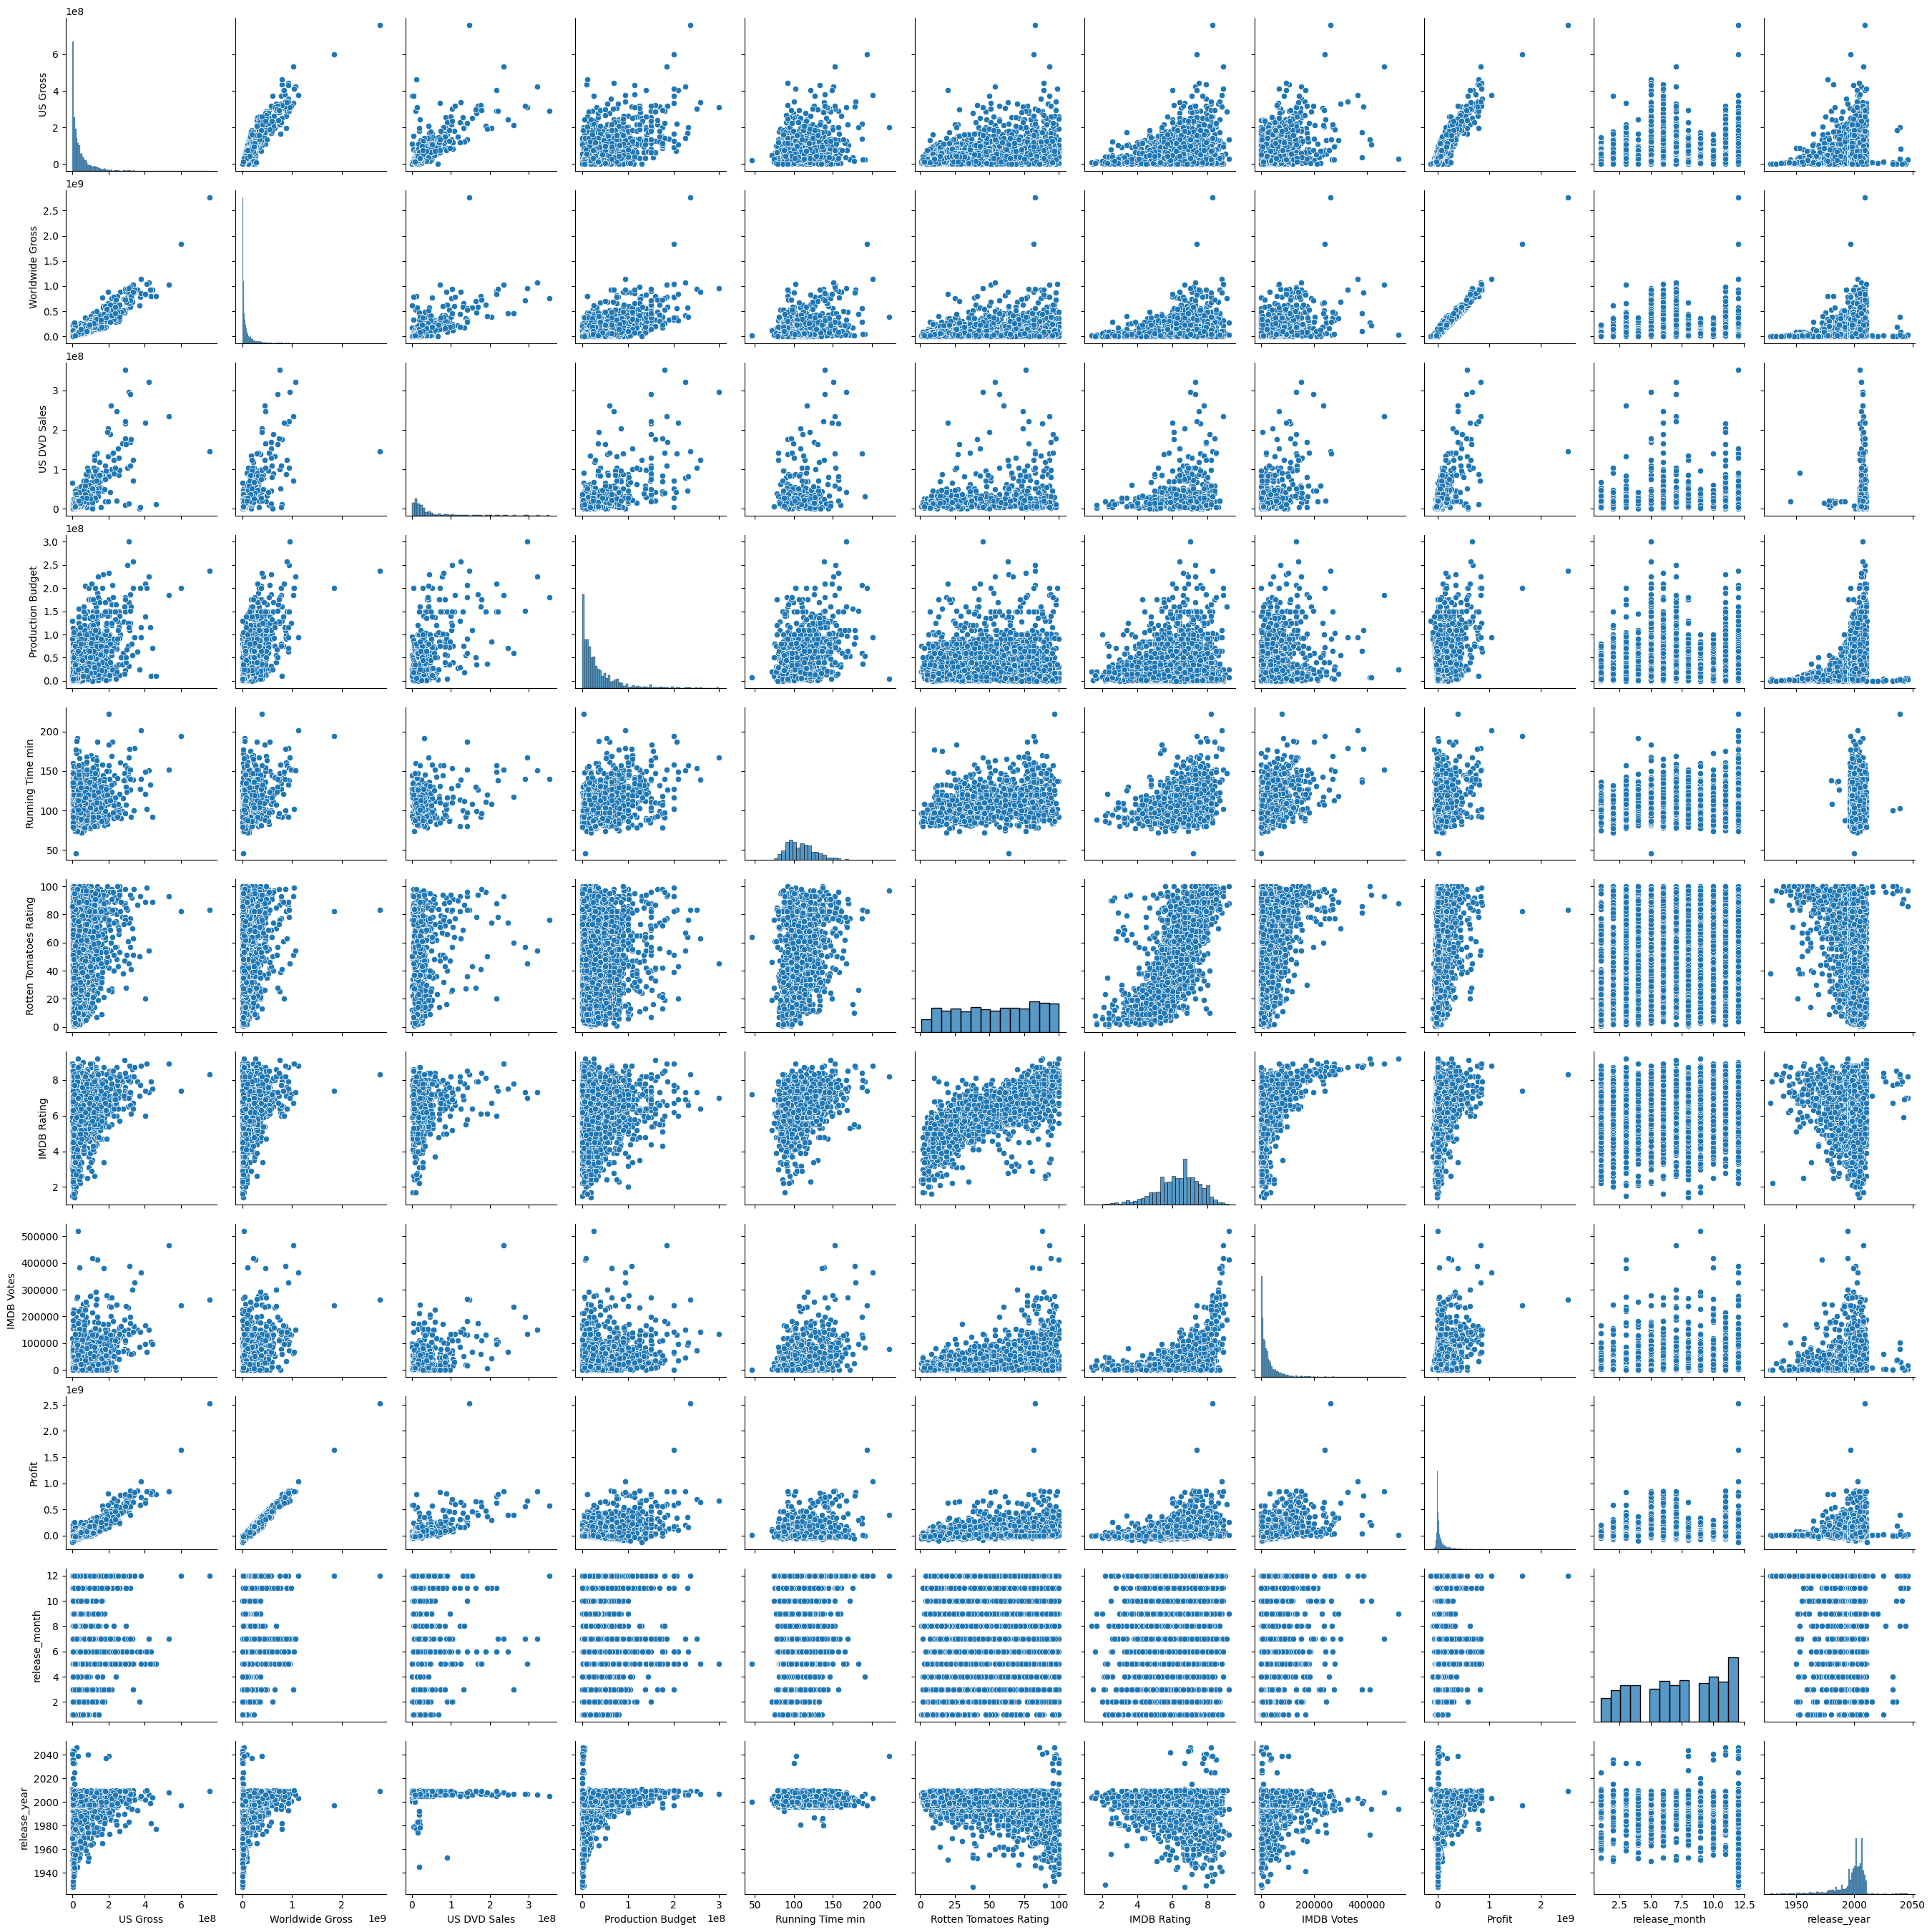

In [52]:
# create list of continuous variables in movies_data
continuous_vars = movies_data.select_dtypes(include=['int64', 'float64']).columns
continuous_data = movies_data[continuous_vars]
sns.pairplot(continuous_data);


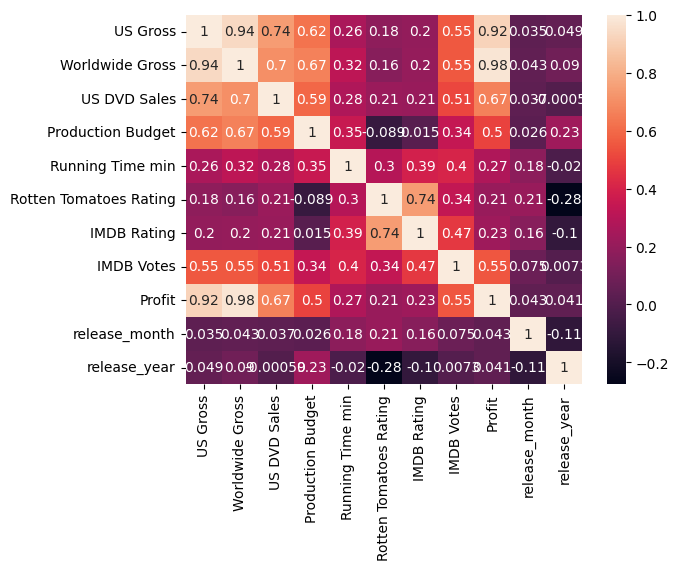

In [54]:
sns.heatmap(continuous_data.corr(), annot=True);

####  D.2.1.2
Are there any trends that you can see in the pairplot, but not in the heatmap?

*(2 points)*

I can see non-linear relationships in the pairplot but not in the heatmap. For instance, IMDB Rating and IMDB Votes appear to be exponentially related, which is intuitive as the movies with the highest IMDB Ratings attract more reviewers and therefore more IMDB Votes at an exponential scale. This non-linear relationship is not evident in the heatmap as the heatmap only shows the correlation coefficient, essentially assuming a linear relationship.

In general, the pairplot helps us visualize the shapes, modality, and skew of relationships, as well as the correlation, while the heatmap only produces a linear correlation coefficient. 

#### D.2.1.3 
Based on the plots in 2(a)(i), which variables are associated with profit?

*(2 points)*

US Gross, Worldwide Gross, US DVD Sales, IMDB Votes, and Production Budget are associated with profit.

#### D.2.1.4
Among the variables listed in 2(a)(iii), select a subset of variables such that none of them are highly associated with each other. The rest of the variables identified in 2(a)(iii) are redundant with regard to association with profit.

*(2 points)*

Production budget and IMDB Votes.

### D.2.2 Nested associations


#### D.2.2.1
Use the code below to create some new columns.

In [55]:
movies_data['screenplay'] = movies_data.Source.apply(lambda x:'Non-original' if x!='Original Screenplay' else x)
movies_data['rating'] = movies_data['MPAA Rating'].apply(lambda x:'R rated' if x=='R' else 'Not R rated')
movies_data['fiction'] = movies_data['Creative Type'].apply(lambda x:'Contemporary' if x=='Contemporary Fiction' else 'other')

Make an appropriate figure to visualize the association of the number of IMDB votes with profit for each genre (use the variable `genre`). Which genre has the highest association between profit and IMDB votes?

*(8 points)*

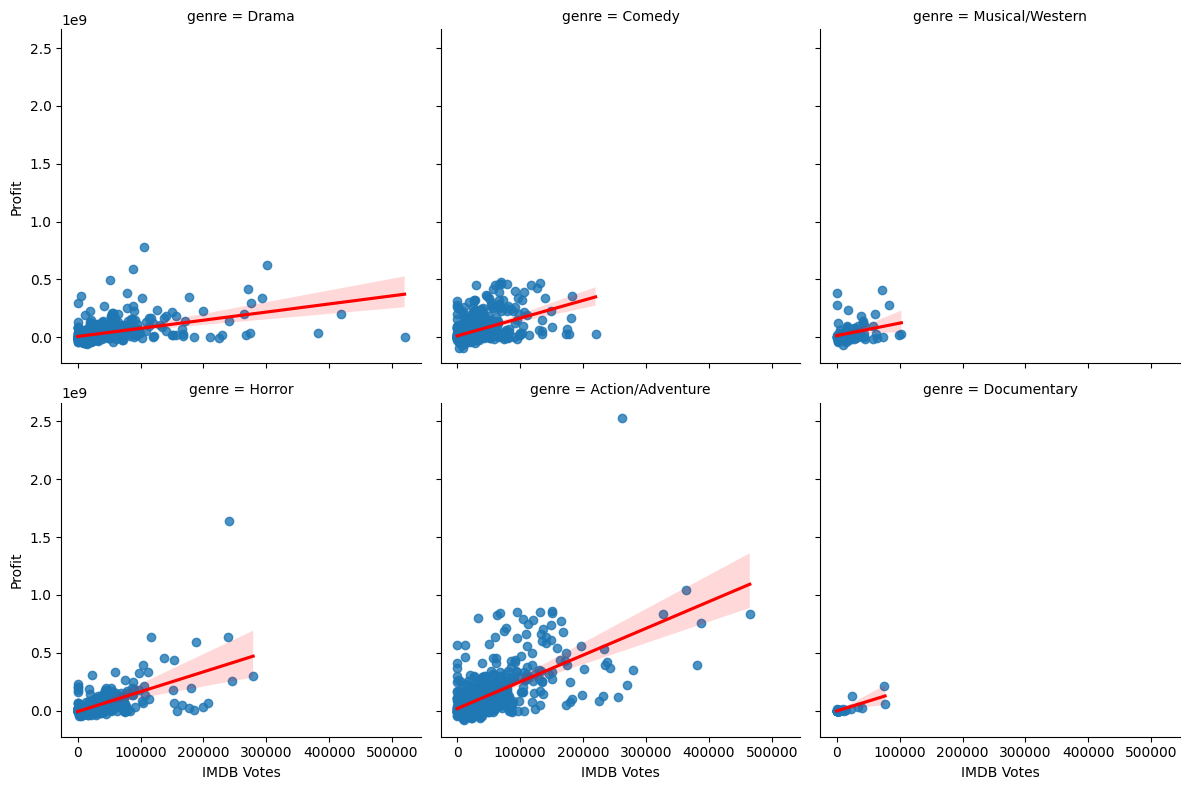

In [64]:
ax = sns.FacetGrid(movies_data, col = "genre", col_wrap = 3, height = 4)
ax.map(sns.regplot, "IMDB Votes", "Profit", line_kws={"color": "red"});


The genre with the highest association between the number of IMDB Votes and Profit is Action/Adventure.

#### D.2.2.2 
Make an appropriate figure to visualize the association between the number of IMDB votes and profit, for each combination of the fiction type (use the variable `fiction`) and the movie rating (use the variable `rating`).

For which combination of `fiction` and `rating` categories do you observe the highest association between IMDB votes and profit?

*(8 points)*

**Hint:** Use *row* and *col* attributes of the Seaborn [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object.

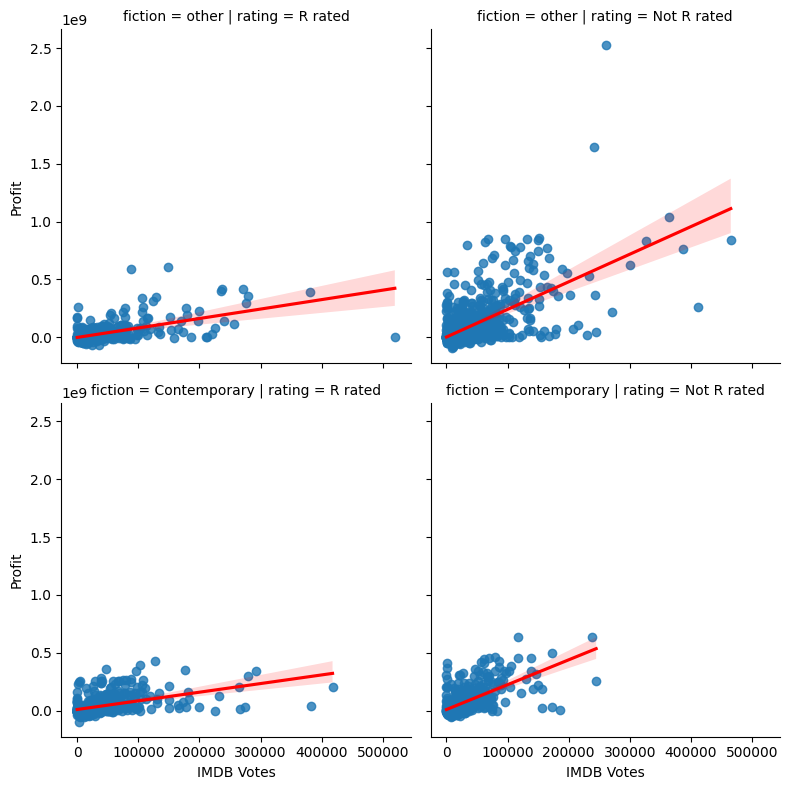

In [63]:
g = sns.FacetGrid(movies_data, row = "fiction", col = "rating", height = 4)
g.map(sns.regplot, "IMDB Votes", "Profit", line_kws={"color": "red"});

"Other" and not R rated is the combination with the highest association between IMDB Votes and Profit.

### D.2.3 Profit based on movie director

#### D.2.3.1
Consider the directors who have directed more than 10 movies (based on the dataset). Make a horizontal barplot that shows the mean profit of the movies of these directors along with the 95% confidence interval. Sort the bars of the barplot such that the  director with the highest mean profit is at the top.

If the dataset `director_with_more_than_10_movies` has only those movies that correspond to directors with more than 10 movies, then the following code will give you the order in which the names of the directors must appear in the barplot:

*(8 points)*

In [69]:
directors = movies_data["Director"].value_counts()
experienced_directors = directors[directors > 10]
director_with_more_than_10_movies = movies_data[movies_data["Director"].isin(experienced_directors.index)]

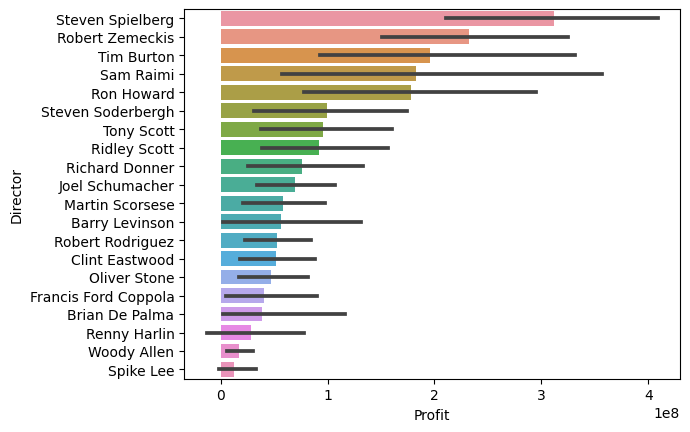

In [81]:
order = director_with_more_than_10_movies[['Director','Profit']].groupby('Director').mean().sort_values(by = 'Profit',
                                            ascending= False).index.to_list()

sns.barplot(data = director_with_more_than_10_movies, x = "Profit", y = "Director", order = order, errorbar=('ci', 95), estimator = "mean");

#### D.2.3.2
Based on the above plot, which director has the highest mean profitability, and which one has the highest variation in profitability?

*(2 points)*

Steven Spielberg has the highest mean profitability and Sam Raimi has the highest variation in profitability.

## D.3 Distributions

### D.3.1 Distribution of profit based on genre (boxplots)
#### D.3.1.1
Make boxplots to visualize the distribution of `profit` based on `genre`. Based on the plot, which genre has the most profitable movies?

*(6 points)*

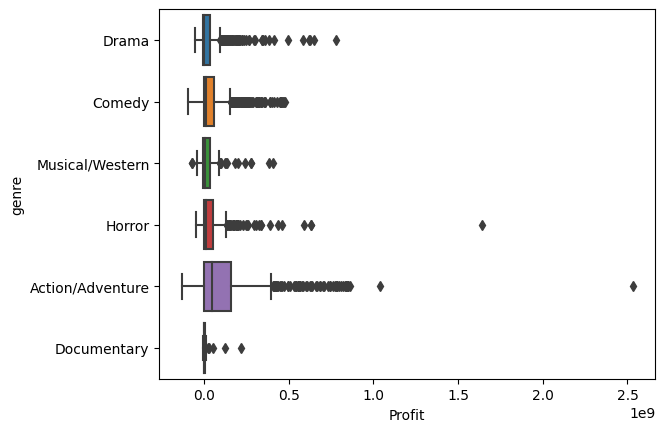

In [84]:
sns.boxplot(data = movies_data, x = "Profit", y = "genre");

Action/Adventure is the genre with the most profitable movies.

#### D.3.1.2
Which genre has the most variation in profit, and which one has the least?

*(2 points)*

Action/Adventure has the most variation in profit and Documentary has the least.

### D.3.2 Distribution of profit based on genre (density plots)
#### D.3.2.1 
Make density plots of `profit` based on `genre`. Adjust the limit on the horizonal axis, so that the plots are clearly visible.

*(6 points)*

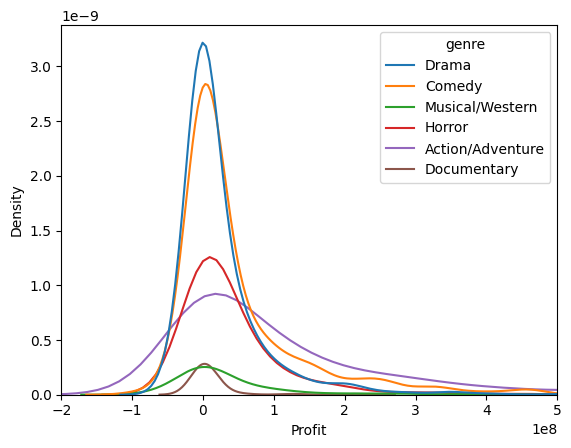

In [100]:
sns.kdeplot(data = movies_data, x = "Profit", hue = "genre");
plt.xlim(-2e8, 5e8);

#### D.3.2.2
What additional insight / trend can you seen in the above plot that you cannot see with the boxplots?

*(2 points)*

The above plot shows us that the distributions of profit for movies of all genres are roughly normally distributed, which we couldn't tell from the box plots. 

## D.4 Insights

From all the visualizations above, describe the insights you get about the factors associated with the profitability of a movie. 

Also, elaborate on the extent to which these trends can be generalized. For example, comment on whether these trends be generalized to the current time and all the Hollywood movies? If not, is there any time period or type of movie to which these trends can be applicable?

*(4+ 4 points)*

The number of IMDB votes a movie receives is associated with the profitability of a movie, with certain genres having stronger correlations between IMDB Votes and profit. More trivially, US Gross and Worldwide Gross are strongly correlated with profitability since a movie's revenues are comprised of its box office grossing both in the US and globally. Each genre has a similar proportion of profitable and unprofitable movies, but certain genres, such as Action/Adventure have greater variance between the most profitable and unprofitable movies in that genre. The director of a movie also appears to be associated with a movie's profitability as more experienced and therefore more renowned directors tend to release more profitable movies. 

These trends are largely generalizable, with the exception of the Musical/Western genre. As displayed in 1.4.1, the profitability of movies in this genre fell dramatically in the early 1990s but has since stabilized. The mean profitability of movies across genres is relatively stable throughout the time frame of the data so the trends identified are generalizable. As pointed out earlier, movies released in the early summer and during the holiday season tend to be more profitable but on the whole the trends I identified can be applied to movies in general.

# Bonus question: Stock Market {-}

This question is worth 20 points. However, there is no partial credit. It will be 20 or 0.

The stock market is made up of exchanges, such as the New York Stock Exchange and the Nasdaq. Stocks are listed on a specific exchange, which brings buyers and sellers together and acts as a market for the shares of those stocks. The exchange tracks the supply and demand — and directly related, the price — of each stock.

A market index tracks the performance of a group of stocks, which either represents the market as a whole or a specific sector of the market, like technology or retail companies. You’re likely to hear most about the S&P 500, the Nasdaq composite and the Dow Jones Industrial Average; they are often used as proxies for the performance of the overall market.

There are two types of investment stratigies: active and passive.

### Active investing {-}
An active investment strategy involves using the information acquired by expert stock analysts to actively buy and sell stocks with specific characteristics. The goal is to beat the results of the indices and general stock market with higher returns and/or lower risk.

### Passive Investing {-}
Passive investors have a buy-and-hold mentality that focuses on benefitting from the overall increase in market prices over time. One of the major benefits of passive investing is that it minimizes the mistakes investors can make when they react emotionally to every move of the stock market.

The easiest way to implement a passive approach is to buy and hold an index fund that follows one of the major indices like the S&P 500, Dow Jones, or Russell 2000 (small-cap stocks). These funds pool money from multiple investors to buy the individual stocks, bonds, or securities that make up their market index. When the index changes its components, the index funds that follow it also switch up their holdings to match.

### Tasks {-}
In this exercise, we use S&P 500 index as an example to explore the gains/returns for passive invesement. 

### Return {-}

The data is provided in a csv file, with dates roughly from 2000 to 2022. And we use the column **Close** as the **price** on a specific day. 

If we buy the index on $t_1$ and sell it on $t_2$, the **return** is defined as

$$ r_{t_1,t_2} = \frac{P_{t_2} - P_{t_1}}{P_{t_1}} $$

Sometimes we are interested on the return on holding the index for a specific period $T$, the return is

$$r_{t,T} = (P_{t+T}-P_{t})/P_{t}$$

where $t$ is the date we buy the stock and $T$ is the holding period. 

Since the stock is not traded on every day, when calculating ${t+T}$ we simply skip the non-trading dates. 

### Risk {-}

If we take the return as a random variable, we could use standard deviation as its risk. A risk-averse investor expects a stable (low volatility) return. 

### Sharpe Ratio {-}

People like high return and low risk investment. But on the other hand, in the market high return always associates high risk (e.g. stock) and low risk means low return (e.g. treasury bonds). 

The Sharpe ratio compares the excess return of an investment with its risk to make a single measure:
$$SR=(R-R_f)/\sigma$$
where $R$ and $\sigma$ are the expected return and stddev for the investment and $R_f$ is the risk free rate. 

Risk free rate is the rate of return offered by an investment that carries zero risk. In reality there is no truly risk free rate, but we usually take something like three-month U.S. Treasury bill as a proxy as risk free rate.
To be simple, in this exercise we just **take risk free rate as 0**. 


**Read the data from sp500.csv.** The dataset can be found in the Datasets section of the book.

In [101]:
sp_500 = pd.read_csv('/Users/vaibhavrangan/Downloads/Stat_303-1/Data/sp500.csv')

## D.5 Return on investment

### D.5.1 Impatient investor (daily)

Suppose there is an investor who only holds the index for a single day (buy yesterday sell today). 

Based on the data, 

#### D.5.1.1
Show the histogram graph for all the possible returns. 

#### D.5.1.2
What is the expected return, risk and sharpe ratio? 

#### D.5.1.3
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?

**HINT**: use `scipy.stats.ttest_1samp` to do one-sided mean test. (We ignore the fact that *T-test* requires the data are sampled from a population of normal distribution, which might not be true in this exercise) 


*(6 points)*

### D.5.2 Patient Investor (yearly)

Suppose there is an investor who will hold the index for a year (suppose there are 250 trading days in a year). 
Do the same analysis as the above:

#### D.5.2.1
Show the histogram graph for all the possible returns. 

#### D.5.2.2
What is the expected return, risk and sharpe ratio? 

#### D.5.2.3
Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?

*(6 points)*

### D.5.3 From daily to yearly 

Explore how the expected return/risk/shape ratio change as we increase our holding period from 1 day to 1 year(250 days).

Show/answer:

#### D.5.3.1 
At least how many days do you need to hold the index in order to make a significant positive return (threshold 0.01)?

#### D.5.3.2
How are the returns associated with the risks for different investment strategies?

#### D.5.3.3
Make a graph as shown below.

*(18 points)*

In [102]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="/Users/vaibhavrangan/Downloads/Stat_303-1/Data/bonus.jpg",width=675)